<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week6/Day3/W6D3_XC_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import and Cleaning:

In [2]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
df.tail(10)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
4988,3/21/2022,6:22,"Wuzhou, Guangxi, China",China Eastern Airlines,MU 5735,Kunming - Guangzhou,Boeing 737-89P WL,B-1791,41474/5453,132.0,123.0,9.0,132.0,123.0,9.0,0.0,"Flying at 29,098 feet, the jetliner started de..."
4989,5/29/2022,10:10,"Near Lete Pass, Nepal",Tara Air,NaN,Pokhara - Jomsom,de Havilland Canada DHC-6 Twin Otter 300,9N-AET,619,22.0,19.0,3.0,22.0,19.0,3.0,0.0,"After takeoff, the pilot initiated a left turn..."
4990,7/16/2022,22:47,"Eleftheroupolis, Greece",Meridian,MEM3032,Nis- Amman,Antonov An-12,UR-CIC,1347701,8.0,0.0,8.0,8.0,0.0,8.0,0.0,The cargo plane carrying eight crew members an...
4991,11/6/2022,8:53,"Bukoba, Tanzania",Precision Air,PW494,Dar es-Salaam -Bukoba,ATR 42-500,5H-PWF,819,43.0,39.0,4.0,19.0,17.0,2.0,0.0,"While on final approach to Bukoba Airport, the..."
4992,11/18/2022,15:11,"Lima, Peru",LATAM,LA2213,Lima - Juliaca,Airbus 320-271N,CC-BHB,7864,108.0,102.0,6.0,0.0,0.0,0.0,0.0,The Airbus A320 collided with a fire truck whi...
4993,11/21/2022,10:15,"Medellín, Colombia",AeroPaca SAS,NaN,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,6.0,2.0,8.0,6.0,2.0,0.0,The plane was chartered to carry a team of six...
4994,1/15/2023,10:50,"Pokhara, Nepal",Yeti Airlines,YT691,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,68.0,4.0,72.0,68.0,4.0,0.0,"Before approach, the pilot requested a change ..."
4995,9/16/2023,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,12.0,2.0,14.0,12.0,2.0,0.0,The air taxi crashed in heavy rain while attem...
4996,10/29/2023,6:30,"Rio Branco, Brazil",ART Taxi Aero,NaN,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The air taxi crashed into a heavy wooded area ...
4997,11/1/2023,14:15,"Morelos, Mexico",Jet Rescue Air Ambulance,NaN,Toluca - Cuernavaca Airport,\tLearjet 35A,XA-IRE,35A-354,4.0,2.0,2.0,4.0,2.0,2.0,0.0,"A business jet operating as an air ambulance, ..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4222 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df = df.drop('Flight #', axis=1)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df['Date']

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
4993   2022-11-21
4994   2023-01-15
4995   2023-09-16
4996   2023-10-29
4997   2023-11-01
Name: Date, Length: 4998, dtype: datetime64[ns]

In [7]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time
df['Time']

0       17:18:00
1            NaT
2       06:30:00
3            NaT
4       18:30:00
          ...   
4993    10:15:00
4994    10:50:00
4995         NaT
4996    06:30:00
4997    14:15:00
Name: Time, Length: 4998, dtype: object

In [8]:
df['Time'].fillna('0:00:00', inplace=True)
df['Time']

0       17:18:00
1        0:00:00
2       06:30:00
3        0:00:00
4       18:30:00
          ...   
4993    10:15:00
4994    10:50:00
4995     0:00:00
4996    06:30:00
4997    14:15:00
Name: Time, Length: 4998, dtype: object

In [9]:
df[df['Aboard'].isna()]

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
26,1919-07-21,16:55:00,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,10.0,"The dirigible, cruising at 1,200 ft. caught f..."
103,1925-09-07,0:00:00,"Toul, France",CIDNA,NaN,Spad 33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,1934-08-10,0:00:00,"Ningbo, China",China National Aviation Corporation,NaN,Sikorsky S-38B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,1935-08-13,0:00:00,"Hangow, China",China National Aviation Corporation,NaN,Sikorsky S-38B,NV40V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destoryed in a storm.
450,1936-12-26,0:00:00,"Nanking, China",China National Aviation Corporation,NaN,Douglas DC-2,NC14269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,1942-10-01,0:00:00,"Kunming, China",China National Aviation Corporation,NaN,Douglas C-47,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...
751,1944-11-09,0:00:00,"Seljord, Norway",Military - U.S. Army Air Corps,NaN,NaN,42-52196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,1946-03-18,0:00:00,"Between Chungking and Shanghai, China",China National Aviation Corporation,Chunking - Shanghai,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disappeared while en route. Plane never located.
1186,1950-07-30,0:00:00,"Algrete, Brazil","SAVG (S.A. Viacao Gaucha, ) SAVG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
1224,1951-01-20,0:00:00,"Huilyo, Peru",Military - TAM,NaN,Douglas DC-3,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN


In [10]:
df.dropna(subset=['Aboard'], inplace=True)

In [11]:
df[df['Aboard'].isna()]

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4980 non-null   datetime64[ns]
 1   Time                   4980 non-null   object        
 2   Location               4976 non-null   object        
 3   Operator               4970 non-null   object        
 4   Route                  4219 non-null   object        
 5   AC Type                4968 non-null   object        
 6   Registration           4717 non-null   object        
 7   cn/ln                  4328 non-null   object        
 8   Aboard                 4980 non-null   float64       
 9   Aboard Passangers      4769 non-null   float64       
 10  Aboard Crew            4772 non-null   float64       
 11  Fatalities             4980 non-null   float64       
 12  Fatalities Passangers  4753 non-null   float64       
 13  Fat

In [13]:
df[['Aboard', 'Fatalities']] = df[['Aboard', 'Fatalities']].astype(int)

In [14]:
df['Aboard Passangers'].fillna(0, inplace=True)
df['Aboard Passangers'] = df['Aboard Passangers'].astype(int)
df['Aboard Crew'].fillna(0, inplace=True)
df['Aboard Crew'] = df['Aboard Crew'].astype(int)
df['Fatalities Passangers'].fillna(0, inplace=True)
df['Fatalities Passangers'] = df['Fatalities Passangers'].astype(int)
df['Fatalities Crew'].fillna(0, inplace=True)
df['Fatalities Crew'] = df['Fatalities Crew'].astype(int)


# Exploratory Data Analysis:

In [15]:
number_of_crashes = len(df)
number_of_crashes

4980

In [16]:
number_of_fatalities = df['Fatalities'].sum()
number_of_fatalities

111561

In [17]:
survival_rate =  (df['Aboard'].sum() - df['Fatalities'].sum())/df['Aboard'].sum()
print(round(survival_rate*1000)/10,'%')

28.2 %


In [18]:
df['survival_rate'] = (df['Aboard'] - df['Fatalities'])/df['Aboard']
df['survival_rate'].head(20)

0     0.500000
1     0.000000
2     0.000000
3     0.000000
4     0.300000
5     0.000000
6     0.487805
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.035714
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.125000
18    0.000000
19    0.000000
Name: survival_rate, dtype: float64

In [19]:
df['Year'] = df['Date'].dt.year

crashes_by_year = df.groupby('Year').size().reset_index(name='Crash_Count')

print(crashes_by_year)

     Year  Crash_Count
0    1908            1
1    1909            1
2    1912            1
3    1913            3
4    1915            2
..    ...          ...
108  2019           13
109  2020            8
110  2021            9
111  2022            6
112  2023            4

[113 rows x 2 columns]


# Statistical Analysis:

In [21]:
print('Fatalities:')
print('Mean:', np.mean(df['Fatalities']))
print('Median:', np.median(df['Fatalities']))
print('Standart Deviation:', np.std(df['Fatalities']))



Fatalities:
Mean: 22.40180722891566
Median: 11.0
Standart Deviation: 35.08609314923643


In [22]:
print('Survival rate:')
print('Mean:', np.mean(df['survival_rate']))
print('Median:', np.median(df['survival_rate']))
print('Standart Deviation:', np.std(df['survival_rate']))


Survival rate:
Mean: 0.181489019431307
Median: nan
Standart Deviation: 0.31169291860403087


In [23]:
t_statistic, p_value = stats.ttest_ind(df['Fatalities'], df['survival_rate'])
print('T-stat:', t_statistic)
print('P value:', p_value)


T-stat: nan
P value: nan


Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).


In [25]:
df.head(10)

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,survival_rate,Year
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0.0,"During a demonstration flight, a U.S. Army fly...",0.500000,1908
1,1909-09-07,0:00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0.0,Eugene Lefebvre was the first pilot to ever be...,0.000000,1909
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0.0,First U.S. dirigible Akron exploded just offsh...,0.000000,1912
3,1913-08-06,0:00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0.0,The first fatal airplane accident in Canada oc...,0.000000,1913
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,0,0,14,0,0,0.0,The airship flew into a thunderstorm and encou...,0.300000,1913
5,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30,0,0,30,0,0,0.0,Hydrogen gas which was being vented was sucked...,0.000000,1913
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),NaN,NaN,41,0,0,21,0,0,0.0,Crashed into trees while attempting to land af...,0.487805,1915
7,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),NaN,NaN,19,0,0,19,0,0,0.0,"Exploded and burned near Neuwerk Island, when...",0.000000,1915
8,1916-07-28,0:00:00,"Near Jambol, Bulgeria",Military - German Army,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20,0,0,20,0,0,0.0,"Crashed near the Black Sea, cause unknown.",0.000000,1916
9,1916-09-24,01:00:00,"Billericay, England",Military - German Navy,NaN,Zeppelin L-32 (airship),NaN,NaN,22,0,0,22,0,0,0.0,Shot down by British aircraft crashing in flames.,0.000000,1916


In [61]:
decades = np.arange(190,203,1)
decades

array([190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202])

In [62]:
s = {year: df[df['Year'].astype(str).str[:3] == year.astype(str)]['Fatalities'].values for year in decades}
s

{190: array([1, 1]),
 191: array([ 5,  1, 14, 30, 21, 19, 20, 22, 19, 27, 20, 20, 23, 21, 24, 14, 18,
        18, 23, 22, 19,  1,  1,  1, 14,  1,  1,  0,  1,  1]),
 192: array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  2,  2,  1,  1,  4,
         1,  1,  3,  2,  1,  2,  1,  1,  1,  2, 46,  5,  2,  5, 34,  5,  7,
        17,  3,  2,  5,  3,  1,  4,  2,  1,  3,  1,  1,  1,  6,  1,  2,  1,
         5,  3,  1, 52,  1,  1,  3,  5,  1,  1,  1,  8,  5,  3,  4,  2,  1,
         1, 14,  1,  1,  2,  1,  1,  1,  6,  2,  5,  3,  2,  7,  4,  0,  3,
         1,  0,  1,  3,  1,  2,  1,  1,  5,  1,  1,  7,  3,  6,  2,  4,  1,
         6,  1,  1,  5,  3,  2,  1,  2,  1,  1,  2,  1,  9,  1,  2,  3,  5,
         1,  6,  4,  1,  7,  5,  1,  7,  3,  3,  1,  1,  1,  3,  1,  1,  5,
        14,  5,  3,  1,  4,  2,  1,  1,  2,  2,  1, 14,  4,  6,  5,  2,  4,
         2,  1,  7,  1,  5,  1,  4,  1,  4,  1,  8,  3,  6,  6,  1,  5,  1,
         7,  1,  2,  4,  7,  3,  1,  1,  1,  2,  5]),
 193: array([ 1, 

In [63]:
df['Year'].astype(str).str[:3]

0       190
1       190
2       191
3       191
4       191
       ... 
4993    202
4994    202
4995    202
4996    202
4997    202
Name: Year, Length: 4980, dtype: object

In [64]:
f_stat, p_value = stats.f_oneway(*s.values())


alpha = 0.05
print(f"ANOVA test: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average fatalities among different regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average fatalities among different regions.")


ANOVA test: F-statistic = 23.13, p-value = 0.0000
Reject the null hypothesis: There is a significant difference in average fatalities among different regions.


In [65]:
f_stat, p_value = stats.f_oneway(s[199],s[200])
print(f"ANOVA test: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

ANOVA test: F-statistic = 1.84, p-value = 0.1748


In [66]:
f_stat, p_value = stats.f_oneway(s[198],s[199])
print(f"ANOVA test: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

ANOVA test: F-statistic = 3.86, p-value = 0.0498


In [67]:
f_stat, p_value = stats.f_oneway(s[197],s[198])
print(f"ANOVA test: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

ANOVA test: F-statistic = 0.38, p-value = 0.5400


The correlation (P-value) between the number of fatalities in the 1970s and 1980s is significant and amounted to 0.54

# Visualization

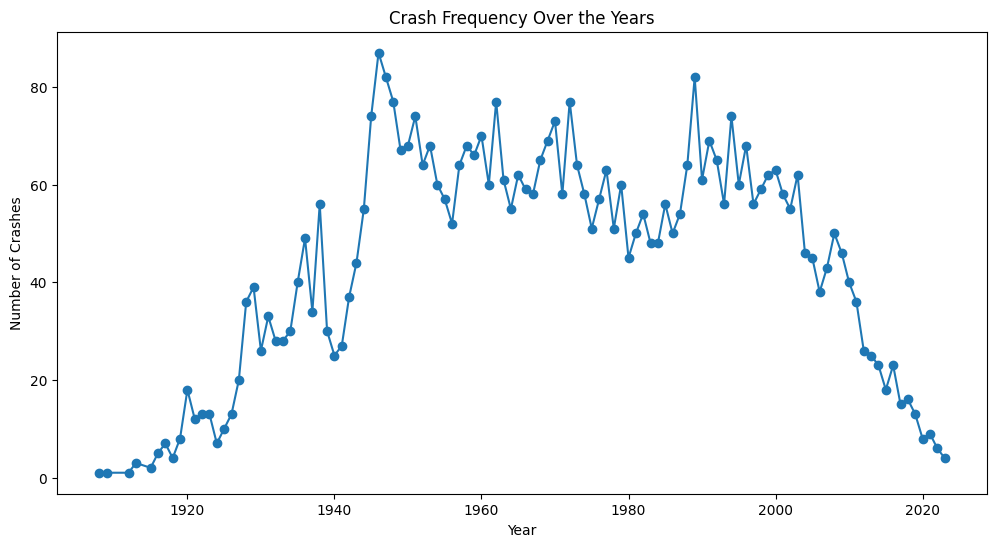

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(crashes_by_year['Year'], crashes_by_year['Crash_Count'], marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Crash Frequency Over the Years')
plt.show()

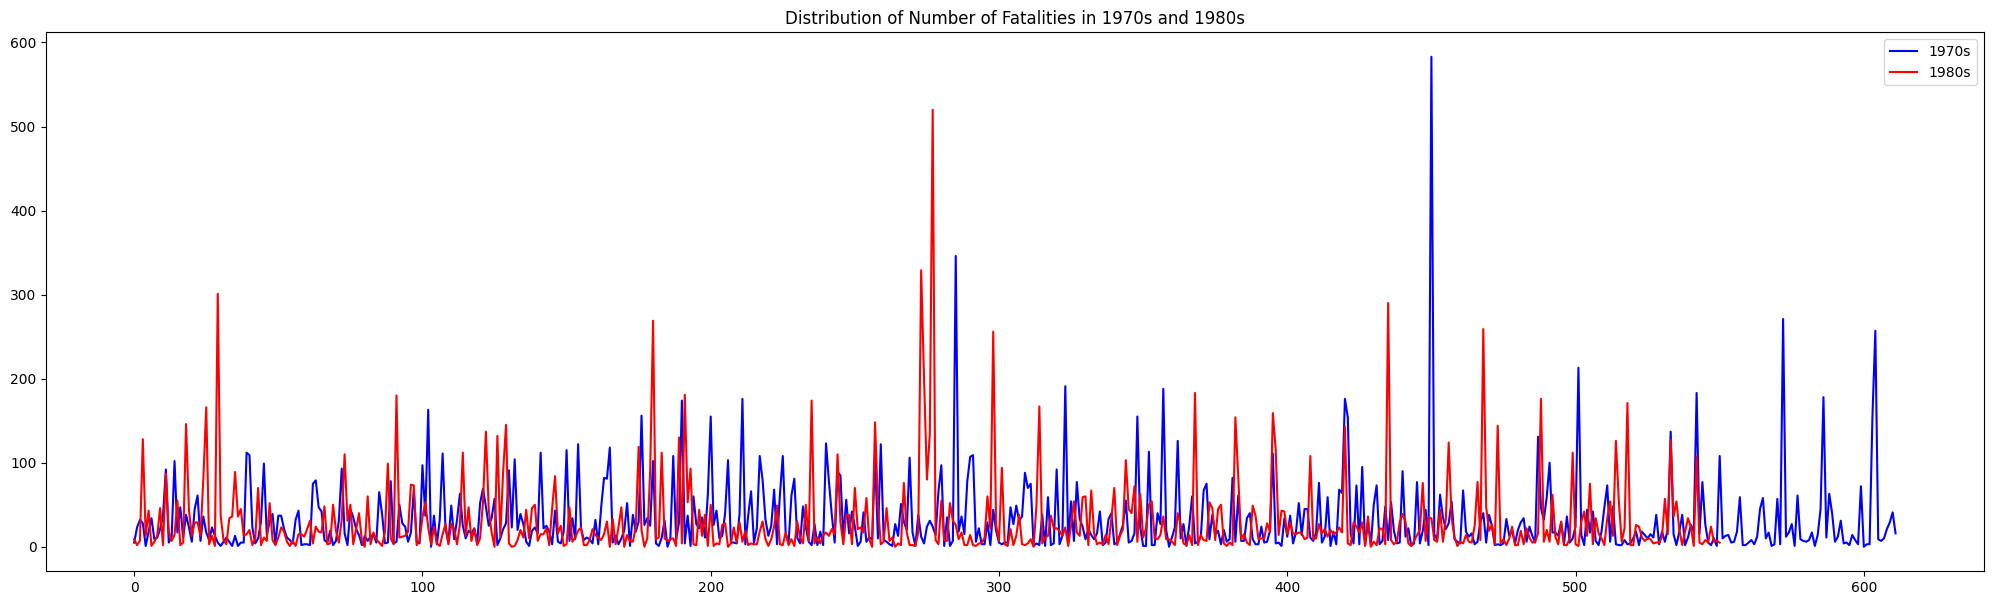

In [69]:
plt.figure(figsize=(25, 7))

x = np.arange(0,612,1)
x2 = np.arange(0,551,1)
y = s[197]
y2 = s[198]
plt.plot(x,y,color='b')
plt.plot(x2,y2,color='r')
plt.legend(['1970s', '1980s'])
plt.title('Distribution of Number of Fatalities in 1970s and 1980s')
plt.show()

In [70]:
sums = {key: sum(value) for key, value in s.items()}
sums

{190: 2,
 191: 421,
 192: 647,
 193: 2033,
 194: 8881,
 195: 11710,
 196: 16884,
 197: 19751,
 198: 16837,
 199: 15983,
 200: 11174,
 201: 6407,
 202: 831}

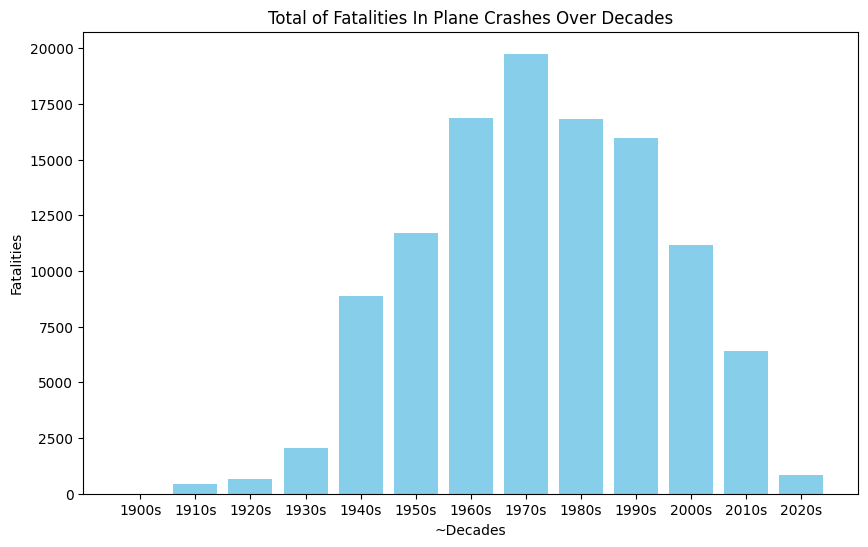

In [72]:
values = list(sums.values())
keys = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')
plt.xlabel('~Decades')
plt.ylabel('Fatalities')
plt.title('Total of Fatalities In Plane Crashes Over Decades')
plt.xticks(keys)
plt.show()

The peak of fatalities in plane crashes was reached in the 1970s and has since declined steadily until the present day.

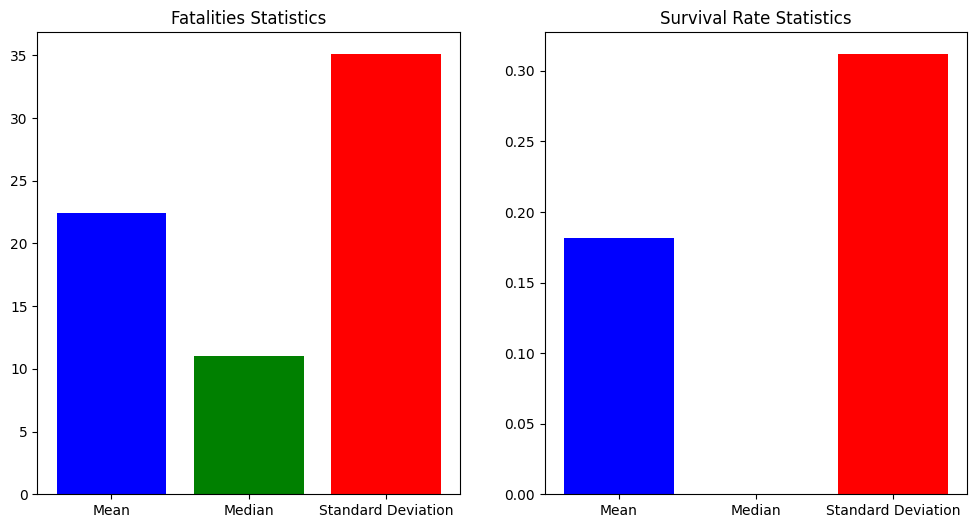

In [77]:
stats_fatalities = [np.mean(df['Fatalities']), np.median(df['Fatalities']), np.std(df['Fatalities'])]
stats_survival_rate = [np.mean(df['survival_rate']), np.median(df['survival_rate']), np.std(df['survival_rate'])]


labels = ['Mean', 'Median', 'Standard Deviation']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(labels, stats_fatalities, color=['blue', 'green', 'red'])
axes[0].set_title('Fatalities Statistics')

axes[1].bar(labels, stats_survival_rate, color=['blue', 'green', 'red'])
axes[1].set_title('Survival Rate Statistics')
plt.show()

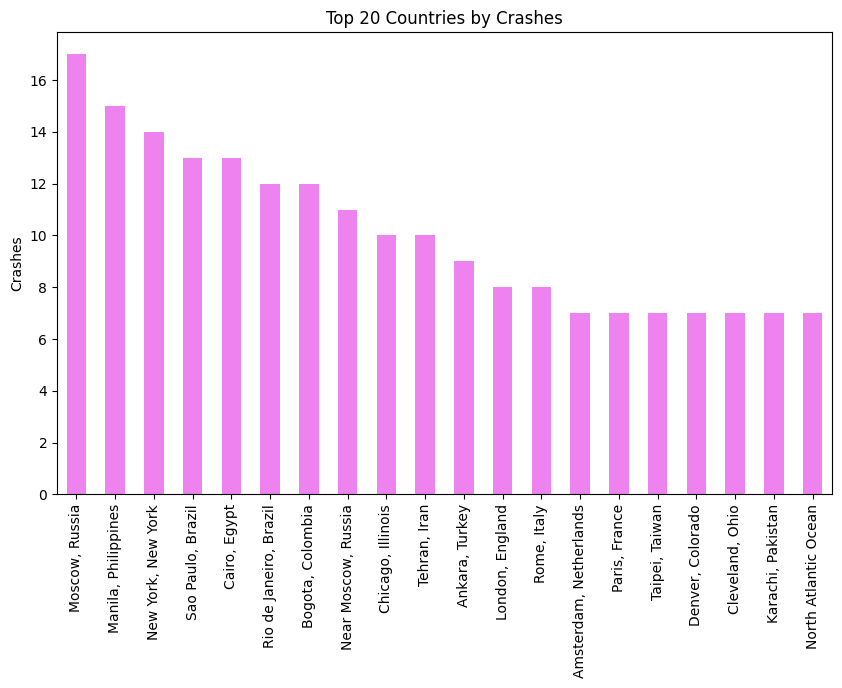

In [86]:
top_10 = df['Location'].value_counts().head(20)
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='violet')
plt.title('Top 20 Countries by Crashes')
plt.ylabel('Crashes')
plt.xticks(rotation=90)
plt.show()
